## Support Vector Machine implementation on 220 Band AVIRIS Hyperspectral Image of Indian Pine Test Site 3 

## Steps :
## --> 1. Load Dataset 
## --> 2. Data Preprocessing (Converting from 3D to 2D)
## --> 3. Handling Imbalance Dataset
## --> 4. Data Cleaning (Removing 0 class) 
## --> 5. Normalization (Z Score Normalization)
## --> 6. Train Test Splitting (70% Train , 30% Test)
## --> 7. Apply Grid search on train dataset and Find best values for hyperparameter
## --> 8. Find Training Accuracy
## --> 9. Testing Accuracy

# 1. Load Dataset

### Import Library

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math
%matplotlib inline


### read .lan file

In [67]:
# import the package
from spectral import *


In [68]:
data = open_image(
    'D:\Academic Thesis Papers\Thesis Report 9\sample-data-master\92AV3C.lan')


In [69]:
data


	Data Source:   'D:\Academic Thesis Papers\Thesis Report 9\sample-data-master\92AV3C.lan'
	# Rows:            145
	# Samples:         145
	# Bands:           220
	Interleave:        BIL
	Quantization:  16 bits
	Data format:     int16

In [70]:
data.shape


(145, 145, 220)

In [71]:
data[:, :, :]


array([[[3172, 4142, 4506, ..., 1020, 1020, 1005],
        [3348, 4266, 4502, ..., 1029, 1020, 1000],
        [3687, 4266, 4421, ..., 1030, 1016, 1009],
        ...,
        [3341, 3890, 4320, ..., 1021, 1015, 1025],
        [3170, 4130, 4320, ..., 1024, 1020, 1011],
        [3172, 3890, 4316, ..., 1034, 1016, 1015]],

       [[3344, 4388, 4334, ..., 1030, 1006, 1015],
        [3515, 4264, 4592, ..., 1039, 1015, 1020],
        [3518, 4268, 4423, ..., 1026, 1015, 1020],
        ...,
        [3859, 4512, 4605, ..., 1035, 1015,  996],
        [3686, 4264, 4690, ..., 1012, 1020, 1014],
        [3512, 4268, 4597, ..., 1019, 1016, 1010]],

       [[3512, 4146, 4416, ..., 1029, 1025, 1010],
        [3344, 4389, 4416, ..., 1021, 1011, 1000],
        [3512, 4273, 4420, ..., 1033, 1010, 1014],
        ...,
        [3341, 4266, 4509, ..., 1025, 1010, 1005],
        [3344, 4262, 4496, ..., 1029, 1020, 1005],
        [3510, 4142, 4230, ..., 1025, 1011, 1010]],

       ...,

       [[3324, 3728, 400

### read ground truth data

In [72]:
ground_truth_data = open_image(
    'D:\Academic Thesis Papers\Thesis Report 9\sample-data-master\92AV3GT.GIS').read_band(0)


In [73]:
ground_truth_data


array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

# 2. Data Preprocessing (Converting from 3D to 2D)

### Prepare dataset by making the band number as features and pixel number as rows

In [74]:
dictionary = dict()
value = list()

for z in range(220):
    count = z + 1
    key = 'band_' + str(count)

    for x in range(145):
        for y in range(145):
            value.append(data[x, y, z])

    dictionary[key] = value
    value = list()

dictionary


{'band_1': [3172,
  3348,
  3687,
  3517,
  3514,
  3343,
  3343,
  3343,
  3346,
  3522,
  3858,
  3514,
  3343,
  3343,
  3343,
  3343,
  3343,
  3343,
  3346,
  3514,
  3341,
  3172,
  3343,
  3341,
  3167,
  3004,
  3514,
  3341,
  3170,
  3170,
  3170,
  3167,
  3002,
  3338,
  2996,
  3004,
  3514,
  3343,
  3346,
  3517,
  3517,
  3514,
  3348,
  3687,
  3514,
  3346,
  3514,
  3343,
  3346,
  3514,
  3343,
  3343,
  3343,
  3348,
  3687,
  3511,
  3172,
  3346,
  3514,
  3346,
  3519,
  3690,
  3690,
  3690,
  3693,
  3858,
  3517,
  3517,
  3511,
  3170,
  3175,
  3514,
  3343,
  3343,
  3341,
  3172,
  3341,
  3167,
  2999,
  3170,
  3162,
  2657,
  3170,
  3167,
  3002,
  3341,
  3172,
  3338,
  2999,
  3170,
  3167,
  2996,
  2999,
  3167,
  3002,
  3341,
  3178,
  3690,
  3687,
  3517,
  3517,
  3514,
  3343,
  3346,
  3511,
  3175,
  3514,
  3343,
  3343,
  3343,
  3341,
  3172,
  3343,
  3346,
  3511,
  3172,
  3341,
  3170,
  3178,
  3685,
  3343,
  3341,
  3175,
  3517

In [75]:
dictionary['band_1']


[3172,
 3348,
 3687,
 3517,
 3514,
 3343,
 3343,
 3343,
 3346,
 3522,
 3858,
 3514,
 3343,
 3343,
 3343,
 3343,
 3343,
 3343,
 3346,
 3514,
 3341,
 3172,
 3343,
 3341,
 3167,
 3004,
 3514,
 3341,
 3170,
 3170,
 3170,
 3167,
 3002,
 3338,
 2996,
 3004,
 3514,
 3343,
 3346,
 3517,
 3517,
 3514,
 3348,
 3687,
 3514,
 3346,
 3514,
 3343,
 3346,
 3514,
 3343,
 3343,
 3343,
 3348,
 3687,
 3511,
 3172,
 3346,
 3514,
 3346,
 3519,
 3690,
 3690,
 3690,
 3693,
 3858,
 3517,
 3517,
 3511,
 3170,
 3175,
 3514,
 3343,
 3343,
 3341,
 3172,
 3341,
 3167,
 2999,
 3170,
 3162,
 2657,
 3170,
 3167,
 3002,
 3341,
 3172,
 3338,
 2999,
 3170,
 3167,
 2996,
 2999,
 3167,
 3002,
 3341,
 3178,
 3690,
 3687,
 3517,
 3517,
 3514,
 3343,
 3346,
 3511,
 3175,
 3514,
 3343,
 3343,
 3343,
 3341,
 3172,
 3343,
 3346,
 3511,
 3172,
 3341,
 3170,
 3178,
 3685,
 3343,
 3341,
 3175,
 3517,
 3517,
 3517,
 3517,
 3519,
 3690,
 3693,
 3858,
 3519,
 3687,
 3522,
 3861,
 3687,
 3517,
 3514,
 3346,
 3514,
 3338,
 3002,
 3341,

### Prepare ground truth data as target data

In [76]:
ground_truth_data


array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [77]:
ground_truth_data.shape


(145, 145)

In [78]:
# number of unique values and their count

diff = dict()

for i in range(145):
    for j in range(145):
        if ground_truth_data[i, j] not in diff:
            diff[ground_truth_data[i, j]] = 1
        else:
            diff[ground_truth_data[i, j]] = diff[ground_truth_data[i, j]] + 1
diff


{3: 834,
 0: 10659,
 15: 380,
 11: 2468,
 12: 614,
 5: 497,
 10: 968,
 14: 1294,
 16: 95,
 2: 1434,
 4: 234,
 8: 489,
 6: 747,
 9: 20,
 1: 54,
 7: 26,
 13: 212}

In [79]:
# number of unique values and their count

diff = dict()

for i in range(145):
    for j in range(145):
        if ground_truth_data[i, j] not in diff:
            diff[ground_truth_data[i, j]] = 1
        else:
            diff[ground_truth_data[i, j]] = diff[ground_truth_data[i, j]] + 1
diff


{3: 834,
 0: 10659,
 15: 380,
 11: 2468,
 12: 614,
 5: 497,
 10: 968,
 14: 1294,
 16: 95,
 2: 1434,
 4: 234,
 8: 489,
 6: 747,
 9: 20,
 1: 54,
 7: 26,
 13: 212}

In [80]:
# number of unique values and their count

diff = dict()

for i in range(145):
    for j in range(145):
        if ground_truth_data[i, j] not in diff:
            diff[ground_truth_data[i, j]] = 1
        else:
            diff[ground_truth_data[i, j]] = diff[ground_truth_data[i, j]] + 1
diff


{3: 834,
 0: 10659,
 15: 380,
 11: 2468,
 12: 614,
 5: 497,
 10: 968,
 14: 1294,
 16: 95,
 2: 1434,
 4: 234,
 8: 489,
 6: 747,
 9: 20,
 1: 54,
 7: 26,
 13: 212}

In [81]:
# number of unique values and their count

diff = dict()

for i in range(145):
    for j in range(145):
        if ground_truth_data[i, j] not in diff:
            diff[ground_truth_data[i, j]] = 1
        else:
            diff[ground_truth_data[i, j]] = diff[ground_truth_data[i, j]] + 1
diff


{3: 834,
 0: 10659,
 15: 380,
 11: 2468,
 12: 614,
 5: 497,
 10: 968,
 14: 1294,
 16: 95,
 2: 1434,
 4: 234,
 8: 489,
 6: 747,
 9: 20,
 1: 54,
 7: 26,
 13: 212}

In [82]:
# number of unique values and their count

diff = dict()

for i in range(145):
    for j in range(145):
        if ground_truth_data[i, j] not in diff:
            diff[ground_truth_data[i, j]] = 1
        else:
            diff[ground_truth_data[i, j]] = diff[ground_truth_data[i, j]] + 1
diff


{3: 834,
 0: 10659,
 15: 380,
 11: 2468,
 12: 614,
 5: 497,
 10: 968,
 14: 1294,
 16: 95,
 2: 1434,
 4: 234,
 8: 489,
 6: 747,
 9: 20,
 1: 54,
 7: 26,
 13: 212}

In [83]:
# number of unique values and their count

diff = dict()

for i in range(145):
    for j in range(145):
        if ground_truth_data[i, j] not in diff:
            diff[ground_truth_data[i, j]] = 1
        else:
            diff[ground_truth_data[i, j]] = diff[ground_truth_data[i, j]] + 1
diff


{3: 834,
 0: 10659,
 15: 380,
 11: 2468,
 12: 614,
 5: 497,
 10: 968,
 14: 1294,
 16: 95,
 2: 1434,
 4: 234,
 8: 489,
 6: 747,
 9: 20,
 1: 54,
 7: 26,
 13: 212}

NB : So there are total 17 classes in this ground truth data

In [84]:
target = ground_truth_data.reshape(21025,)
target


array([3, 3, 3, ..., 0, 0, 0], dtype=int8)

In [85]:
print(target.shape)
print(target.ndim)


(21025,)
1


### making df

In [86]:
df = pd.DataFrame(dictionary)


In [87]:
df


band_1  band_2  band_3  band_4  band_5  band_6  band_7  band_8  band_9  \
0        3172    4142    4506    4279    4782    5048    5213    5106    5053   
1        3348    4266    4502    4426    4853    5249    5352    5353    5347   
2        3687    4266    4421    4498    5019    5293    5438    5427    5383   
3        3517    4258    4603    4493    4958    5234    5417    5355    5349   
4        3514    4018    4675    4417    4886    5117    5215    5096    5098   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
21020    3329    3987    4011    4023    4201    4377    4418    4248    4180   
21021    3494    4104    4024    3880    4210    4377    4413    4174    4229   
21022    3153    3864    4282    3889    4310    4372    4375    4208    4096   
21023    3155    4104    4109    4027    4139    4318    4413    4174    4140   
21024    3323    3860    4197    3952    4148    4279    4375    4225    3988   

       band_10  ...  band_211  band_212  band_213  band_214  band_215  \
0         4750  ...      1094      1090      1112      1090      1062   
1         5065  ...      1108      1104      1117      1091      1079   
2         5132  ...      1111      1114      1114      1100      1065   
3         5096  ...      1122      1108      1109      1109      1071   
4         4834  ...      1110      1107      1112      1094      1072   
...        ...  ...       ...       ...       ...       ...       ...   
21020     3838  ...      1013      1012      1018      1015      1011   
21021     3900  ...      1012      1014      1012      1024       998   
21022     3878  ...      1016      1015      1016      1021      1008   
21023     3933  ...      1005      1011      1008      1012      1014   
21024     3866  ...      1018      1014      1007      1015      1002   

       band_216  band_217  band_218  band_219  band_220  
0          1069      1057      1020      1020      1005  
1          1085      1064      1029      1020      1000  
2          1092      1061      1030      1016      1009  
3          1088      1060      1030      1006      1005  
4          1087      1052      1034      1019      1019  
...         ...       ...       ...       ...       ...  
21020      1001      1000      1009      1008      1009  
21021      1010      1006      1000      1000      1004  
21022      1019      1003      1008      1000      1009  
21023      1007      1011      1005      1003      1004  
21024      1010      1007      1004      1000      1000  

[21025 rows x 220 columns]

In [88]:
target


array([3, 3, 3, ..., 0, 0, 0], dtype=int8)

In [89]:
target.shape


(21025,)

In [90]:
df['target'] = target
df


band_1  band_2  band_3  band_4  band_5  band_6  band_7  band_8  band_9  \
0        3172    4142    4506    4279    4782    5048    5213    5106    5053   
1        3348    4266    4502    4426    4853    5249    5352    5353    5347   
2        3687    4266    4421    4498    5019    5293    5438    5427    5383   
3        3517    4258    4603    4493    4958    5234    5417    5355    5349   
4        3514    4018    4675    4417    4886    5117    5215    5096    5098   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
21020    3329    3987    4011    4023    4201    4377    4418    4248    4180   
21021    3494    4104    4024    3880    4210    4377    4413    4174    4229   
21022    3153    3864    4282    3889    4310    4372    4375    4208    4096   
21023    3155    4104    4109    4027    4139    4318    4413    4174    4140   
21024    3323    3860    4197    3952    4148    4279    4375    4225    3988   

       band_10  ...  band_212  band_213  band_214  band_215  band_216  \
0         4750  ...      1090      1112      1090      1062      1069   
1         5065  ...      1104      1117      1091      1079      1085   
2         5132  ...      1114      1114      1100      1065      1092   
3         5096  ...      1108      1109      1109      1071      1088   
4         4834  ...      1107      1112      1094      1072      1087   
...        ...  ...       ...       ...       ...       ...       ...   
21020     3838  ...      1012      1018      1015      1011      1001   
21021     3900  ...      1014      1012      1024       998      1010   
21022     3878  ...      1015      1016      1021      1008      1019   
21023     3933  ...      1011      1008      1012      1014      1007   
21024     3866  ...      1014      1007      1015      1002      1010   

       band_217  band_218  band_219  band_220  target  
0          1057      1020      1020      1005       3  
1          1064      1029      1020      1000       3  
2          1061      1030      1016      1009       3  
3          1060      1030      1006      1005       3  
4          1052      1034      1019      1019       3  
...         ...       ...       ...       ...     ...  
21020      1000      1009      1008      1009       0  
21021      1006      1000      1000      1004       0  
21022      1003      1008      1000      1009       0  
21023      1011      1005      1003      1004       0  
21024      1007      1004      1000      1000       0  

[21025 rows x 221 columns]

# 3. Handling Imbalance Dataset

In [91]:
df['target'].value_counts()


0     10659
11     2468
2      1434
14     1294
10      968
3       834
6       747
12      614
5       497
8       489
15      380
4       234
13      212
16       95
1        54
7        26
9        20
Name: target, dtype: int64

from here it is clear that class no 16 , 1 , 7 and 9 have less number of samples.

In [92]:
total = df['target'].value_counts().sum() - df['target'].value_counts()[0]
total

10366

In [93]:
# total number of extra data
num_of_data_to_be_added = 20000
num_of_data_to_be_added


20000

### functions to generate synthetic samples

In [94]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.neighbors import NearestNeighbors


def generate_synthetic_samples(original_samples, num_samples_to_generate, k_neighbors=5):
    # Create a Nearest Neighbors model
    nn_model = NearestNeighbors(n_neighbors=k_neighbors)
    nn_model.fit(original_samples)

    synthetic_samples = []

    while len(synthetic_samples) < num_samples_to_generate:
        # Choose a random sample from the minority class
        random_sample_idx = np.random.randint(0, len(original_samples))
        random_sample = original_samples[random_sample_idx]

        # Find the k nearest neighbors of the random sample
        _, neighbors_idx = nn_model.kneighbors(
            [random_sample], n_neighbors=k_neighbors)
        neighbors = original_samples[neighbors_idx[0]]

        # Calculate the mean feature values of neighbors
        mean_features = np.mean(neighbors, axis=0)

        # Create a synthetic sample using feature interpolation
        synthetic_sample = random_sample + \
            np.random.uniform(-0.5, 0.5) * (mean_features - random_sample)
        synthetic_samples.append(synthetic_sample)

    return np.array(synthetic_samples)


In [95]:
names = []
st = 'band_'
for i in range(220):
    names.append(st+str(i+1))

for i in range(1,17):
    original_samples_class_i = df[df['target'] == i].drop('target', axis=1)
    num_samples_to_generate_class_i = int( len(original_samples_class_i) * num_of_data_to_be_added / total)
    synthetic_samples_class_i = generate_synthetic_samples(original_samples_class_i.values, num_samples_to_generate_class_i)
    synthetic_samples_class_i = pd.DataFrame(data=synthetic_samples_class_i, columns=names)
    synthetic_samples_class_i['target'] = i
    df = df.append(synthetic_samples_class_i, ignore_index=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_9812\3365882927.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(synthetic_samples_class_i, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_9812\3365882927.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(synthetic_samples_class_i, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_9812\3365882927.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(synthetic_samples_class_i, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_9812\3365882927.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(synthe

### Final df

In [96]:
df


band_1       band_2       band_3       band_4       band_5  \
0      3172.000000  4142.000000  4506.000000  4279.000000  4782.000000   
1      3348.000000  4266.000000  4502.000000  4426.000000  4853.000000   
2      3687.000000  4266.000000  4421.000000  4498.000000  5019.000000   
3      3517.000000  4258.000000  4603.000000  4493.000000  4958.000000   
4      3514.000000  4018.000000  4675.000000  4417.000000  4886.000000   
...            ...          ...          ...          ...          ...   
41013  3818.342964  4890.333589  5484.986988  5263.350139  5873.256481   
41014  3675.640525  4620.206793  5079.609848  5038.468182  5533.141666   
41015  4027.003797  5110.113406  5493.920182  5440.422957  6257.313347   
41016  3525.052660  4653.723953  4919.797953  4870.327492  5367.304850   
41017  3852.725613  4769.400211  5255.463354  5252.672555  5697.433562   

            band_6       band_7       band_8       band_9      band_10  ...  \
0      5048.000000  5213.000000  5106.000000  5053.000000  4750.000000  ...   
1      5249.000000  5352.000000  5353.000000  5347.000000  5065.000000  ...   
2      5293.000000  5438.000000  5427.000000  5383.000000  5132.000000  ...   
3      5234.000000  5417.000000  5355.000000  5349.000000  5096.000000  ...   
4      5117.000000  5215.000000  5096.000000  5098.000000  4834.000000  ...   
...            ...          ...          ...          ...          ...  ...   
41013  6443.027360  6652.689467  6526.317707  6650.085716  6370.259351  ...   
41014  6060.248486  6315.924252  6121.677653  6179.277276  5878.835601  ...   
41015  6849.522635  7075.622898  7030.321817  7052.526140  6890.815830  ...   
41016  5933.341286  6077.277263  6068.604754  6128.387699  5937.397761  ...   
41017  6156.754943  6470.139467  6351.327445  6327.757975  6180.965133  ...   

          band_212     band_213     band_214     band_215     band_216  \
0      1090.000000  1112.000000  1090.000000  1062.000000  1069.000000   
1      1104.000000  1117.000000  1091.000000  1079.000000  1085.000000   
2      1114.000000  1114.000000  1100.000000  1065.000000  1092.000000   
3      1108.000000  1109.000000  1109.000000  1071.000000  1088.000000   
4      1107.000000  1112.000000  1094.000000  1072.000000  1087.000000   
...            ...          ...          ...          ...          ...   
41013  1081.895532  1081.023056  1051.092222  1042.290347  1060.709653   
41014  1092.585228  1085.751514  1072.765909  1060.624243  1063.780304   
41015  1082.899737  1103.098510  1090.798306  1066.598949  1068.299328   
41016  1129.422833  1144.644921  1114.355079  1093.373905  1102.390214   
41017  1063.039415  1077.001516  1059.003032  1046.977261  1057.977261   

          band_217     band_218     band_219     band_220  target  
0      1057.000000  1020.000000  1020.000000  1005.000000       3  
1      1064.000000  1029.000000  1020.000000  1000.000000       3  
2      1061.000000  1030.000000  1016.000000  1009.000000       3  
3      1060.000000  1030.000000  1006.000000  1005.000000       3  
4      1052.000000  1034.000000  1019.000000  1019.000000       3  
...            ...          ...          ...          ...     ...  
41013  1023.580695  1018.860232  1009.511528  1003.592940      16  
41014  1045.429167  1033.429167  1020.131440  1009.000000      16  
41015  1040.799766  1025.899445  1013.700088  1001.400759      16  
41016  1067.151818  1042.560857  1009.387699  1012.100373      16  
41017  1053.896915  1011.004548  1009.989388  1000.025771      16  

[41018 rows x 221 columns]

In [97]:
df['target'].value_counts()


0     10659
11     7229
2      4200
14     3790
10     2835
3      2443
6      2188
12     1798
5      1455
8      1432
15     1113
4       685
13      621
16      278
1       158
7        76
9        58
Name: target, dtype: int64

In [98]:
# df = df.sample(frac=1, random_state=np.random.seed())
# df


# 4. Data Cleaning (Removing 0 class) 

In [99]:
df = df[df['target'] != 0]


In [100]:
df


band_1       band_2       band_3       band_4       band_5  \
0      3172.000000  4142.000000  4506.000000  4279.000000  4782.000000   
1      3348.000000  4266.000000  4502.000000  4426.000000  4853.000000   
2      3687.000000  4266.000000  4421.000000  4498.000000  5019.000000   
3      3517.000000  4258.000000  4603.000000  4493.000000  4958.000000   
4      3514.000000  4018.000000  4675.000000  4417.000000  4886.000000   
...            ...          ...          ...          ...          ...   
41013  3818.342964  4890.333589  5484.986988  5263.350139  5873.256481   
41014  3675.640525  4620.206793  5079.609848  5038.468182  5533.141666   
41015  4027.003797  5110.113406  5493.920182  5440.422957  6257.313347   
41016  3525.052660  4653.723953  4919.797953  4870.327492  5367.304850   
41017  3852.725613  4769.400211  5255.463354  5252.672555  5697.433562   

            band_6       band_7       band_8       band_9      band_10  ...  \
0      5048.000000  5213.000000  5106.000000  5053.000000  4750.000000  ...   
1      5249.000000  5352.000000  5353.000000  5347.000000  5065.000000  ...   
2      5293.000000  5438.000000  5427.000000  5383.000000  5132.000000  ...   
3      5234.000000  5417.000000  5355.000000  5349.000000  5096.000000  ...   
4      5117.000000  5215.000000  5096.000000  5098.000000  4834.000000  ...   
...            ...          ...          ...          ...          ...  ...   
41013  6443.027360  6652.689467  6526.317707  6650.085716  6370.259351  ...   
41014  6060.248486  6315.924252  6121.677653  6179.277276  5878.835601  ...   
41015  6849.522635  7075.622898  7030.321817  7052.526140  6890.815830  ...   
41016  5933.341286  6077.277263  6068.604754  6128.387699  5937.397761  ...   
41017  6156.754943  6470.139467  6351.327445  6327.757975  6180.965133  ...   

          band_212     band_213     band_214     band_215     band_216  \
0      1090.000000  1112.000000  1090.000000  1062.000000  1069.000000   
1      1104.000000  1117.000000  1091.000000  1079.000000  1085.000000   
2      1114.000000  1114.000000  1100.000000  1065.000000  1092.000000   
3      1108.000000  1109.000000  1109.000000  1071.000000  1088.000000   
4      1107.000000  1112.000000  1094.000000  1072.000000  1087.000000   
...            ...          ...          ...          ...          ...   
41013  1081.895532  1081.023056  1051.092222  1042.290347  1060.709653   
41014  1092.585228  1085.751514  1072.765909  1060.624243  1063.780304   
41015  1082.899737  1103.098510  1090.798306  1066.598949  1068.299328   
41016  1129.422833  1144.644921  1114.355079  1093.373905  1102.390214   
41017  1063.039415  1077.001516  1059.003032  1046.977261  1057.977261   

          band_217     band_218     band_219     band_220  target  
0      1057.000000  1020.000000  1020.000000  1005.000000       3  
1      1064.000000  1029.000000  1020.000000  1000.000000       3  
2      1061.000000  1030.000000  1016.000000  1009.000000       3  
3      1060.000000  1030.000000  1006.000000  1005.000000       3  
4      1052.000000  1034.000000  1019.000000  1019.000000       3  
...            ...          ...          ...          ...     ...  
41013  1023.580695  1018.860232  1009.511528  1003.592940      16  
41014  1045.429167  1033.429167  1020.131440  1009.000000      16  
41015  1040.799766  1025.899445  1013.700088  1001.400759      16  
41016  1067.151818  1042.560857  1009.387699  1012.100373      16  
41017  1053.896915  1011.004548  1009.989388  1000.025771      16  

[30359 rows x 221 columns]

In [101]:
x = df[df.columns[:-1]]
x


band_1       band_2       band_3       band_4       band_5  \
0      3172.000000  4142.000000  4506.000000  4279.000000  4782.000000   
1      3348.000000  4266.000000  4502.000000  4426.000000  4853.000000   
2      3687.000000  4266.000000  4421.000000  4498.000000  5019.000000   
3      3517.000000  4258.000000  4603.000000  4493.000000  4958.000000   
4      3514.000000  4018.000000  4675.000000  4417.000000  4886.000000   
...            ...          ...          ...          ...          ...   
41013  3818.342964  4890.333589  5484.986988  5263.350139  5873.256481   
41014  3675.640525  4620.206793  5079.609848  5038.468182  5533.141666   
41015  4027.003797  5110.113406  5493.920182  5440.422957  6257.313347   
41016  3525.052660  4653.723953  4919.797953  4870.327492  5367.304850   
41017  3852.725613  4769.400211  5255.463354  5252.672555  5697.433562   

            band_6       band_7       band_8       band_9      band_10  ...  \
0      5048.000000  5213.000000  5106.000000  5053.000000  4750.000000  ...   
1      5249.000000  5352.000000  5353.000000  5347.000000  5065.000000  ...   
2      5293.000000  5438.000000  5427.000000  5383.000000  5132.000000  ...   
3      5234.000000  5417.000000  5355.000000  5349.000000  5096.000000  ...   
4      5117.000000  5215.000000  5096.000000  5098.000000  4834.000000  ...   
...            ...          ...          ...          ...          ...  ...   
41013  6443.027360  6652.689467  6526.317707  6650.085716  6370.259351  ...   
41014  6060.248486  6315.924252  6121.677653  6179.277276  5878.835601  ...   
41015  6849.522635  7075.622898  7030.321817  7052.526140  6890.815830  ...   
41016  5933.341286  6077.277263  6068.604754  6128.387699  5937.397761  ...   
41017  6156.754943  6470.139467  6351.327445  6327.757975  6180.965133  ...   

          band_211     band_212     band_213     band_214     band_215  \
0      1094.000000  1090.000000  1112.000000  1090.000000  1062.000000   
1      1108.000000  1104.000000  1117.000000  1091.000000  1079.000000   
2      1111.000000  1114.000000  1114.000000  1100.000000  1065.000000   
3      1122.000000  1108.000000  1109.000000  1109.000000  1071.000000   
4      1110.000000  1107.000000  1112.000000  1094.000000  1072.000000   
...            ...          ...          ...          ...          ...   
41013  1086.651296  1081.895532  1081.023056  1051.092222  1042.290347   
41014  1098.765909  1092.585228  1085.751514  1072.765909  1060.624243   
41015  1104.398131  1082.899737  1103.098510  1090.798306  1066.598949   
41016  1139.390214  1129.422833  1144.644921  1114.355079  1093.373905   
41017  1071.016675  1063.039415  1077.001516  1059.003032  1046.977261   

          band_216     band_217     band_218     band_219     band_220  
0      1069.000000  1057.000000  1020.000000  1020.000000  1005.000000  
1      1085.000000  1064.000000  1029.000000  1020.000000  1000.000000  
2      1092.000000  1061.000000  1030.000000  1016.000000  1009.000000  
3      1088.000000  1060.000000  1030.000000  1006.000000  1005.000000  
4      1087.000000  1052.000000  1034.000000  1019.000000  1019.000000  
...            ...          ...          ...          ...          ...  
41013  1060.709653  1023.580695  1018.860232  1009.511528  1003.592940  
41014  1063.780304  1045.429167  1033.429167  1020.131440  1009.000000  
41015  1068.299328  1040.799766  1025.899445  1013.700088  1001.400759  
41016  1102.390214  1067.151818  1042.560857  1009.387699  1012.100373  
41017  1057.977261  1053.896915  1011.004548  1009.989388  1000.025771  

[30359 rows x 220 columns]

In [102]:
y = df['target']
y


0         3
1         3
2         3
3         3
4         3
         ..
41013    16
41014    16
41015    16
41016    16
41017    16
Name: target, Length: 30359, dtype: int64

# 5. Normalization (Z Score Normalization)

In [103]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(x)
standardized_data


array([[-1.00113178, -0.04087184,  0.59822452, ..., -0.02090251,
         1.35516274, -0.48288185],
       [-0.16212892,  0.51287774,  0.58257517, ...,  0.75261015,
         1.35516274, -1.1800378 ],
       [ 1.45390499,  0.51287774,  0.26567571, ...,  0.838556  ,
         0.79373589,  0.0748429 ],
       ...,
       [ 3.07472407,  4.28245388,  4.46330318, ...,  0.48613032,
         0.47092776, -0.98472825],
       [ 0.68189203,  2.24434528,  2.21714239, ...,  1.91810954,
        -0.13434499,  0.50713161],
       [ 2.24392922,  2.76092334,  3.53037923, ..., -0.79402429,
        -0.04989379, -1.17644449]])

In [104]:
x = pd.DataFrame(data=standardized_data)
x


0         1         2         3         4         5         6    \
0     -1.001132 -0.040872  0.598225  0.082031  0.444808  0.290452  0.435216   
1     -0.162129  0.512878  0.582575  0.605024  0.649602  0.774812  0.729960   
2      1.453905  0.512878  0.265676  0.861183  1.128415  0.880840  0.912320   
3      0.643505  0.477152  0.977721  0.843395  0.952466  0.738665  0.867790   
4      0.629203 -0.594621  1.259410  0.573004  0.744788  0.456725  0.439456   
...         ...       ...       ...       ...       ...       ...       ...   
30354  2.080025  3.300978  4.428353  3.584125  3.592450  3.652115  3.488027   
30355  1.399754  2.094667  2.842381  2.784046  2.611416  2.729715  2.773928   
30356  3.074724  4.282454  4.463303  4.214110  4.700231  4.631666  4.384842   
30357  0.681892  2.244345  2.217142  2.185840  2.133073  2.423901  2.267885   
30358  2.243929  2.760923  3.530379  3.546137  3.085303  2.962271  3.100936   

            7         8         9    ...       210       211       212  \
0      0.447830  0.366406  0.220687  ...  0.358240  0.303301  0.690362   
1      0.946834  0.913408  0.798895  ...  0.714092  0.661962  0.808857   
2      1.096333  0.980387  0.921879  ...  0.790346  0.918148  0.737760   
3      0.950874  0.917129  0.855798  ...  1.069945  0.764436  0.619265   
4      0.427627  0.450131  0.374876  ...  0.764928  0.738818  0.690362   
...         ...       ...       ...  ...       ...       ...       ...   
30354  3.317238  3.337862  3.194804  ...  0.171451  0.095675 -0.043763   
30355  2.499761  2.461900  2.292756  ...  0.479380  0.369531  0.068297   
30356  4.335456  4.086622  4.150328  ...  0.622540  0.121402  0.479405   
30357  2.392540  2.367217  2.400252  ...  1.511969  1.313260  1.464017   
30358  2.963712  2.738155  2.847339  ... -0.225950 -0.387393 -0.139070   

            213       214       215       216       217       218       219  
0      0.699256  0.359371  0.397917  0.827899 -0.020903  1.355163 -0.482882  
1      0.728155  0.994110  0.929769  1.160246  0.752610  1.355163 -1.180038  
2      0.988245  0.471384  1.162454  1.017811  0.838556  0.793736  0.074843  
3      1.248336  0.695409  1.029491  0.970333  0.838556 -0.609831 -0.482882  
4      0.814851  0.732747  0.996251  0.590508  1.182339  1.214806  1.469155  
...         ...       ...       ...       ...       ...       ...       ...  
30354 -0.425138 -0.376541  0.122340 -0.758786 -0.118861 -0.116965 -0.679070  
30355  0.201209  0.308003  0.224411  0.278538  1.133279  1.373611  0.074843  
30356  0.722326  0.531085  0.374626  0.058743  0.486130  0.470928 -0.984728  
30357  1.403092  1.530798  1.507833  1.309888  1.918110 -0.134345  0.507132  
30358 -0.196524 -0.201543  0.031513  0.680570 -0.794024 -0.049894 -1.176444  

[30359 rows x 220 columns]

In [105]:
name = list()
for i in range(x.shape[1]):
    name.append('PC'+str(i+1))
name


['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16',
 'PC17',
 'PC18',
 'PC19',
 'PC20',
 'PC21',
 'PC22',
 'PC23',
 'PC24',
 'PC25',
 'PC26',
 'PC27',
 'PC28',
 'PC29',
 'PC30',
 'PC31',
 'PC32',
 'PC33',
 'PC34',
 'PC35',
 'PC36',
 'PC37',
 'PC38',
 'PC39',
 'PC40',
 'PC41',
 'PC42',
 'PC43',
 'PC44',
 'PC45',
 'PC46',
 'PC47',
 'PC48',
 'PC49',
 'PC50',
 'PC51',
 'PC52',
 'PC53',
 'PC54',
 'PC55',
 'PC56',
 'PC57',
 'PC58',
 'PC59',
 'PC60',
 'PC61',
 'PC62',
 'PC63',
 'PC64',
 'PC65',
 'PC66',
 'PC67',
 'PC68',
 'PC69',
 'PC70',
 'PC71',
 'PC72',
 'PC73',
 'PC74',
 'PC75',
 'PC76',
 'PC77',
 'PC78',
 'PC79',
 'PC80',
 'PC81',
 'PC82',
 'PC83',
 'PC84',
 'PC85',
 'PC86',
 'PC87',
 'PC88',
 'PC89',
 'PC90',
 'PC91',
 'PC92',
 'PC93',
 'PC94',
 'PC95',
 'PC96',
 'PC97',
 'PC98',
 'PC99',
 'PC100',
 'PC101',
 'PC102',
 'PC103',
 'PC104',
 'PC105',
 'PC106',
 'PC107',
 'PC108',
 'PC109',
 'PC110',
 'PC111'

In [106]:
x.columns = name
x


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     -1.001132 -0.040872  0.598225  0.082031  0.444808  0.290452  0.435216   
1     -0.162129  0.512878  0.582575  0.605024  0.649602  0.774812  0.729960   
2      1.453905  0.512878  0.265676  0.861183  1.128415  0.880840  0.912320   
3      0.643505  0.477152  0.977721  0.843395  0.952466  0.738665  0.867790   
4      0.629203 -0.594621  1.259410  0.573004  0.744788  0.456725  0.439456   
...         ...       ...       ...       ...       ...       ...       ...   
30354  2.080025  3.300978  4.428353  3.584125  3.592450  3.652115  3.488027   
30355  1.399754  2.094667  2.842381  2.784046  2.611416  2.729715  2.773928   
30356  3.074724  4.282454  4.463303  4.214110  4.700231  4.631666  4.384842   
30357  0.681892  2.244345  2.217142  2.185840  2.133073  2.423901  2.267885   
30358  2.243929  2.760923  3.530379  3.546137  3.085303  2.962271  3.100936   

            PC8       PC9      PC10  ...     PC211     PC212     PC213  \
0      0.447830  0.366406  0.220687  ...  0.358240  0.303301  0.690362   
1      0.946834  0.913408  0.798895  ...  0.714092  0.661962  0.808857   
2      1.096333  0.980387  0.921879  ...  0.790346  0.918148  0.737760   
3      0.950874  0.917129  0.855798  ...  1.069945  0.764436  0.619265   
4      0.427627  0.450131  0.374876  ...  0.764928  0.738818  0.690362   
...         ...       ...       ...  ...       ...       ...       ...   
30354  3.317238  3.337862  3.194804  ...  0.171451  0.095675 -0.043763   
30355  2.499761  2.461900  2.292756  ...  0.479380  0.369531  0.068297   
30356  4.335456  4.086622  4.150328  ...  0.622540  0.121402  0.479405   
30357  2.392540  2.367217  2.400252  ...  1.511969  1.313260  1.464017   
30358  2.963712  2.738155  2.847339  ... -0.225950 -0.387393 -0.139070   

          PC214     PC215     PC216     PC217     PC218     PC219     PC220  
0      0.699256  0.359371  0.397917  0.827899 -0.020903  1.355163 -0.482882  
1      0.728155  0.994110  0.929769  1.160246  0.752610  1.355163 -1.180038  
2      0.988245  0.471384  1.162454  1.017811  0.838556  0.793736  0.074843  
3      1.248336  0.695409  1.029491  0.970333  0.838556 -0.609831 -0.482882  
4      0.814851  0.732747  0.996251  0.590508  1.182339  1.214806  1.469155  
...         ...       ...       ...       ...       ...       ...       ...  
30354 -0.425138 -0.376541  0.122340 -0.758786 -0.118861 -0.116965 -0.679070  
30355  0.201209  0.308003  0.224411  0.278538  1.133279  1.373611  0.074843  
30356  0.722326  0.531085  0.374626  0.058743  0.486130  0.470928 -0.984728  
30357  1.403092  1.530798  1.507833  1.309888  1.918110 -0.134345  0.507132  
30358 -0.196524 -0.201543  0.031513  0.680570 -0.794024 -0.049894 -1.176444  

[30359 rows x 220 columns]

# 6. Train Test Splitting (70% Train , 30% Test)

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42)


In [108]:
X_train


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
10581  1.253349  0.995888  0.360183  0.996582  1.072191  0.946073  1.132062   
17346 -0.205317 -0.775034 -1.126807 -1.031196 -1.010844 -1.071660 -1.043845   
3043   0.695942  0.468221  0.981634  1.362829  1.448586  1.030245  1.198583   
18948 -1.119582 -0.199317  0.599171  0.285851  0.389483  0.474095  0.256646   
9362   0.495726 -0.804510 -0.970623 -0.814527 -1.386799 -1.201181 -1.278120   
...         ...       ...       ...       ...       ...       ...       ...   
29802  0.581274  0.428088  0.206803 -0.010389  0.175174  0.270289  0.308372   
5390  -0.052487 -0.165912  0.543452 -0.227495  0.237130  0.377203  0.380083   
860   -1.887805 -1.800366 -1.549650 -1.035109 -1.383914 -1.321668 -1.345975   
15795 -1.298308  0.934878 -0.289602 -0.372292 -0.032884  0.132673  0.100457   
23654  0.660837 -0.117199 -0.502545  0.261724  0.075216 -0.082526 -0.080238   

            PC8       PC9      PC10  ...     PC211     PC212     PC213  \
10581  1.214510  1.075957  1.185335  ...  0.911155  0.857009  1.065871   
17346 -0.982288 -1.144886 -1.041474  ... -1.105691 -1.140789 -1.116798   
3043   1.124616  1.170163  1.182531  ...  0.993691  0.738818  0.856256   
18948  0.443071  0.415347  0.467993  ...  0.339863  0.392891  0.579224   
9362  -1.299693 -1.499724 -1.400131  ... -1.598947 -1.618097 -1.418857   
...         ...       ...       ...  ...       ...       ...       ...   
29802 -0.008445  0.093825  0.016947  ... -0.785822 -0.853337 -0.852539   
5390   0.211460  0.329195  0.358356  ...  0.612420  0.405775  0.619265   
860   -1.376463 -1.415999 -1.427665  ... -1.522693 -1.618097 -1.513653   
15795 -0.029155 -0.108031 -0.001859  ... -0.445553 -0.448421 -0.394922   
23654  0.108100  0.052842  0.090305  ...  0.140802  0.155615  0.387257   

          PC214     PC215     PC216     PC217     PC218     PC219     PC220  
10581  0.870117  0.905004  0.897723  1.161202  1.150853  1.431798  1.298073  
17346 -1.051526 -0.809400 -0.877383 -0.807918 -0.905411 -0.536832 -1.704306  
3043   0.843750  0.956773  1.095973  1.350158 -0.020903 -0.329118  1.469155  
18948  0.180550  0.671570  0.093132  0.517007  0.850207  1.430450  0.803502  
9362  -1.814952 -1.544848 -1.563286 -1.735919 -1.396036 -1.451971 -1.180038  
...         ...       ...       ...       ...       ...       ...       ...  
29802 -0.983311 -0.762050 -0.902908 -0.641341 -1.239437 -0.893320 -0.054940  
5390   0.439165  0.172683  0.231714  0.115727  0.666664 -0.890545 -0.622313  
860   -1.410367 -1.246147 -1.363842 -1.308616 -1.653874  0.513022 -0.622313  
15795 -0.690693 -0.720638 -0.651915 -0.643922 -0.098524 -0.126218  0.117856  
23654  0.334962  0.371146  0.484535  0.311879 -0.136324  0.553599  0.867456  

[21251 rows x 220 columns]

In [109]:
X_test


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
21377  0.647617  0.943839  1.263322  1.419577  1.146118  1.155840  1.232754   
16221 -0.365378 -1.361325 -1.320399 -1.099863 -0.852126 -1.060224 -0.915114   
8341  -0.181197 -0.179309  0.148306  0.284824  0.589029  0.215750  0.367361   
14092 -1.044809 -0.153917  0.092191  0.307841  0.186564  0.257482  0.163099   
12135  1.424589 -0.076423 -0.032936 -0.157019 -0.068628 -0.197895  0.134041   
...         ...       ...       ...       ...       ...       ...       ...   
10493  0.666746  0.478122  0.571899  0.769916  0.381700  0.365218  0.286262   
5625   0.781749  0.977313  0.891650  0.299055  0.413079  0.254306  0.397047   
8542  -1.010666 -0.170378  0.222640  0.565888  0.470768  0.900118  0.825381   
586    2.254771  2.191989  2.049702  2.177559  2.345641  2.297772  2.292743   
23294  2.313117  0.399748  0.852557  1.117698  0.748235  0.616937  0.598245   

            PC8       PC9      PC10  ...     PC211     PC212     PC213  \
21377  1.117556  1.320581  1.190213  ...  1.052708  0.816401  1.226045   
16221 -0.778821 -0.883685 -0.712120  ... -0.929697 -0.703631 -0.863075   
8341   0.490255  0.325474  0.382218  ...  0.434494  0.328919  0.453371   
14092  0.414142  0.268214  0.342564  ...  0.322820  0.212480  0.281232   
12135 -0.060651 -0.088721 -0.103233  ...  0.378700  0.119248  0.161672   
...         ...       ...       ...  ...       ...       ...       ...   
10493  0.365541  0.377756  0.361223  ...  0.350804  0.533255  0.594998   
5625   0.379141  0.465015  0.440957  ...  0.764928  0.738818  0.903654   
8542   0.839760  0.850149  0.819086  ...  1.247871  1.148716  0.927353   
586    2.138786  2.122764  2.177416  ...  1.705395  1.814800  1.733122   
23294  0.738731  0.741235  0.776696  ...  0.913270  1.315426  1.147489   

          PC214     PC215     PC216     PC217     PC218     PC219     PC220  
21377  1.320087  1.411054  1.439277  1.201993  2.180632  0.592087  0.158172  
16221 -0.634343 -0.892109 -0.620393 -0.688507 -1.026530 -1.524665  0.117322  
8341   0.381367  0.359371  0.165232  0.068249  0.322881 -0.750188  0.911430  
14092  0.401503  0.391856  0.218634  0.081619  0.207148  0.494781 -0.592111  
12135  0.185224 -0.058887  0.201420  0.219103 -0.080940  1.212317 -0.076950  
...         ...       ...       ...       ...       ...       ...       ...  
10493  0.360923  0.525123  0.229282  0.295222  1.117384  1.108729 -0.959085  
5625   0.930447  1.031448  0.796806  0.922855  1.096394  0.513022 -0.622313  
8542   0.959346  0.882098  1.295417  1.445114  0.752610 -0.750188  0.771999  
586    1.797416  1.927551  1.794028  1.824939  2.041798  0.653379  1.608586  
23294  0.869266  1.229211  0.867180  1.355346  1.896741  0.502067 -0.491589  

[9108 rows x 220 columns]

In [110]:
y_train


21240     2
28005     6
5854      2
29607    10
18085    14
         ..
40461    15
9082     10
1575     14
26454     5
34313    11
Name: target, Length: 21251, dtype: int64

In [111]:
y_train.value_counts()

11    5080
2     2895
14    2681
10    1999
3     1709
6     1551
12    1251
5     1011
8     1000
15     768
4      474
13     426
16     198
1      114
7       57
9       37
Name: target, dtype: int64

In [112]:
y_test


32036    11
26880     5
15422    11
24751     3
22794     2
         ..
21152     2
9486     11
15992    11
1114     11
33953    11
Name: target, Length: 9108, dtype: int64

In [113]:
y_test.value_counts()


11    2149
2     1305
14    1109
10     836
3      734
6      637
12     547
5      444
8      432
15     345
4      211
13     195
16      80
1       44
9       21
7       19
Name: target, dtype: int64

# 7. Apply Grid search on training dataset and Find best values for hyperparameter

In [114]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV, train_test_split


In [115]:
model = svm.SVC()


In [116]:
param_grid = {
    'C': [1, 5, 7, 10, 15, 30, 32, 50, 100, 150, 200],
    'kernel': ['rbf']
}


In [117]:
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1, 5, 7, 10, 15, 30, 32, 50, 100, 150, 200],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [118]:
best_params = grid_search.best_params_
print(best_params)


{'C': 150, 'kernel': 'rbf'}


In [119]:
best_params['C']


150

In [120]:
print(grid_search.best_score_)


0.9821185324553152


In [121]:
# from sklearn import svm
# from sklearn.metrics import accuracy_score


In [122]:
# train_accuracy = 0
# best_train_accuracy = 0

# for train_C in np.arange(1,50,9):
#     for train_gamma in np.arange(0.001,0.1,0.005):

#         model = svm.SVC(kernel='rbf',C=train_C, gamma=train_gamma)
#         model.fit(X_train,y_train)
#         y_pred = model.predict(X_train)
#         train_accuracy = accuracy_score(y_train, y_pred)

#         if train_accuracy > best_train_accuracy:
#             best_train_accuracy = train_accuracy
#             best_train_C = train_C
#             best_train_gamma = train_gamma

#         print('Current C : ',train_C,'Current gamma : ',train_gamma,'Current Accuracy : ',train_accuracy)
#         print('Current Best C : ',best_train_C,'Current Best gamma : ',best_train_gamma,'Current Best Accuracy : ',best_train_accuracy)
#         print('-------------------------------------------------------------------------------------------------------------')


due to no validation , the best_train_C and best_train_gamma ,  we have got from this manual grid search on only training dataset , aren't working well on testing dataset.

In [123]:
# print(best_train_C)
# print(best_train_gamma)
# print(best_train_accuracy)


# 8. Find Training Accuracy

In [124]:
from sklearn.metrics import accuracy_score
final_model = svm.SVC(kernel='rbf', C=best_params['C'])
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print('Training Accuracy :', accuracy)


Training Accuracy : 0.9999058867817985


# 9. Testing Accuracy

In [125]:
# accuracy and classification report

from sklearn.metrics import classification_report
final_model = svm.SVC(kernel='rbf', C=best_params['C'])
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Overall Testing Accuracy :', accuracy)


report = classification_report(y_test, y_pred, labels=sorted(y_test.unique()))
print('\nClassification Report:\n')
print(report)


Overall Testing Accuracy : 0.9830917874396136

Classification Report:

              precision    recall  f1-score   support

           1       1.00      0.93      0.96        44
           2       0.98      0.98      0.98      1305
           3       0.98      0.96      0.97       734
           4       0.98      0.97      0.97       211
           5       0.99      1.00      0.99       444
           6       1.00      1.00      1.00       637
           7       1.00      1.00      1.00        19
           8       0.99      1.00      1.00       432
           9       1.00      0.90      0.95        21
          10       0.97      0.99      0.98       836
          11       0.98      0.97      0.98      2149
          12       0.98      1.00      0.99       547
          13       1.00      0.99      1.00       195
          14       0.99      1.00      0.99      1109
          15       0.97      0.96      0.96       345
          16       1.00      0.99      0.99        80

    accur

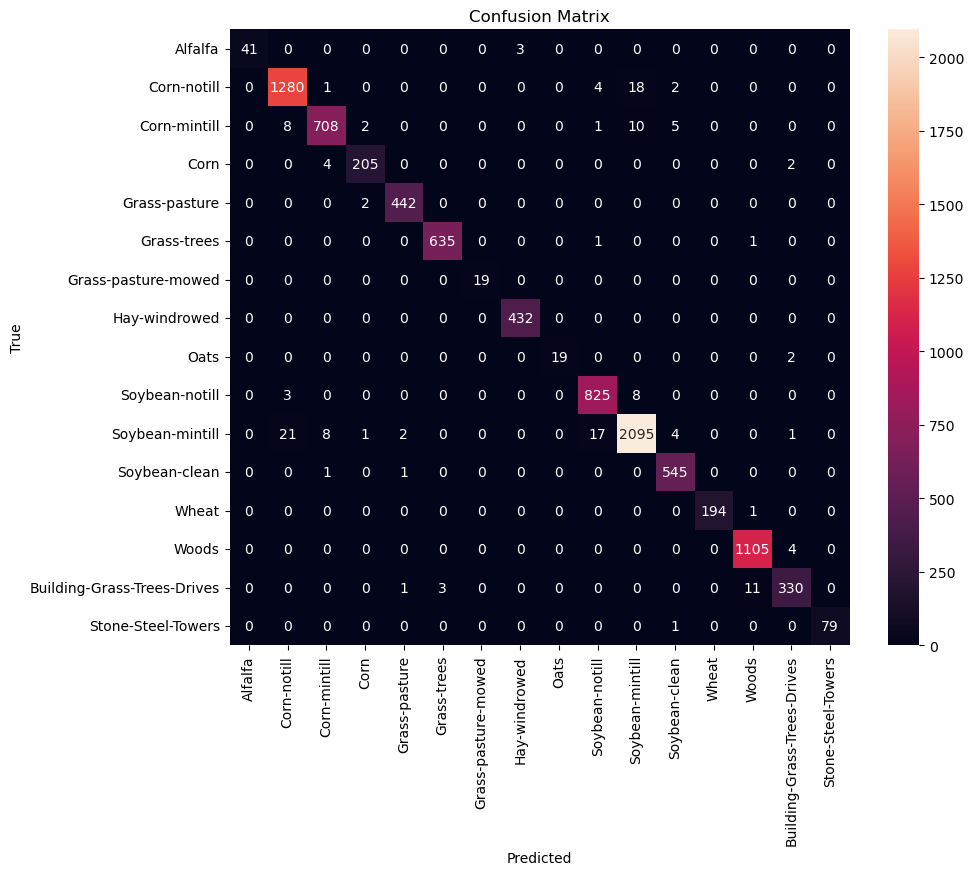

In [126]:
# confusion matrix
from sklearn.metrics import confusion_matrix

# Replace these with your actual ground truth and predicted labels
true_labels = y_test
predicted_labels = y_pred

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class labels (optional)
class_labels = ['Alfalfa', 'Corn-notill', 'Corn-mintill', 'Corn', 'Grass-pasture', 'Grass-trees', 'Grass-pasture-mowed', 'Hay-windrowed', 'Oats', 'Soybean-notill',
                'Soybean-mintill', 'Soybean-clean', 'Wheat', 'Woods', 'Building-Grass-Trees-Drives', 'Stone-Steel-Towers']

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
# sns.set(font_scale=1.2)
# ns.set_style("whitegrid")
sns.heatmap(cm, annot=True, fmt="g", xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# ------------------------------------End-----------------------------------------

In [127]:
sorted(y_test.unique())


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [128]:
y_test.value_counts()


11    2149
2     1305
14    1109
10     836
3      734
6      637
12     547
5      444
8      432
15     345
4      211
13     195
16      80
1       44
9       21
7       19
Name: target, dtype: int64

In [129]:
# classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, labels=sorted(y_test.unique()))
print(report)


              precision    recall  f1-score   support

           1       1.00      0.93      0.96        44
           2       0.98      0.98      0.98      1305
           3       0.98      0.96      0.97       734
           4       0.98      0.97      0.97       211
           5       0.99      1.00      0.99       444
           6       1.00      1.00      1.00       637
           7       1.00      1.00      1.00        19
           8       0.99      1.00      1.00       432
           9       1.00      0.90      0.95        21
          10       0.97      0.99      0.98       836
          11       0.98      0.97      0.98      2149
          12       0.98      1.00      0.99       547
          13       1.00      0.99      1.00       195
          14       0.99      1.00      0.99      1109
          15       0.97      0.96      0.96       345
          16       1.00      0.99      0.99        80

    accuracy                           0.98      9108
   macro avg       0.99   

In [130]:
class_accuracies = {}
class_sample_counts = {}

# Calculate per-class accuracy and sample counts
for class_label in set(y_test):
    class_indices = y_test == class_label
    class_accuracy = accuracy_score(
        y_test[class_indices], y_pred[class_indices])
    class_sample_count = sum(class_indices)
    class_accuracies[class_label] = class_accuracy
    class_sample_counts[class_label] = class_sample_count

# Print per-class accuracies and sample counts
print("Per-Class Accuracies and Sample Counts:")
for class_label, class_accuracy in class_accuracies.items():
    class_samples = class_sample_counts[class_label]
    print(
        f"Class {class_label}: Accuracy = {class_accuracy:.2f}, Samples = {class_samples}")


Per-Class Accuracies and Sample Counts:
Class 1: Accuracy = 0.93, Samples = 44
Class 2: Accuracy = 0.98, Samples = 1305
Class 3: Accuracy = 0.96, Samples = 734
Class 4: Accuracy = 0.97, Samples = 211
Class 5: Accuracy = 1.00, Samples = 444
Class 6: Accuracy = 1.00, Samples = 637
Class 7: Accuracy = 1.00, Samples = 19
Class 8: Accuracy = 1.00, Samples = 432
Class 9: Accuracy = 0.90, Samples = 21
Class 10: Accuracy = 0.99, Samples = 836
Class 11: Accuracy = 0.97, Samples = 2149
Class 12: Accuracy = 1.00, Samples = 547
Class 13: Accuracy = 0.99, Samples = 195
Class 14: Accuracy = 1.00, Samples = 1109
Class 15: Accuracy = 0.96, Samples = 345
Class 16: Accuracy = 0.99, Samples = 80
